<a href="https://colab.research.google.com/github/jcaicedoro/G1-Algoritmos/blob/main/Lab5/G1_Genetic_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def fx(x):  #O(1)
    #Funciones 
    #x
    #math.cos(x)+5
    #math.sin(x)+45+x*7
    #-(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    #-((0.1+(1-x))**(2)-0.5*math.sin(6*math.pi*(1-x**(2))))+10  

    return -(0.1+(1-x)**2-0.5*math.sin(6*math.pi*(1-x**2)))+10#math.sin(x)
    
def listToDecimal(num): #O(genomeSize)
    decimal = 0                 #O(1)
    for i in range(len(num)):   #O(1*genomeSize)
        decimal+=num[i]*10**(-i)    #O(1)
    return decimal

def generateRandomGenome(ind_size, populationSize, genetic_pool):   #O(PopulationSize)
    """
    Genera la pobalción inicial
    """
    poblacion = []              #O(1)
    for i in range(populationSize):                                         #O(4*1*PopulationSize)~=O(PopulationSize)
        individuo = []                                                      #O(1)
        individuo += [np.random.choice(genetic_pool[0])]                    #~O(1)
        individuo += list(np.random.choice(genetic_pool[1],ind_size-1))     #~O(1)
        poblacion.append(individuo)                                         #O(1)
    return poblacion            #O(1)

def plotGen(population, x_axis, y_axis):    #O(PopulationSize*genomeSize)
    """
    Genera la gráfica de los puntos en y generados por la población
    """
    for individuo in population:    #O((2*1+genomeSize)*len(population))~=O(PopulationSize*genomeSize)
        x = listToDecimal(individuo)    #~O(genomeSize)
        y = fx(x)                       #O(1)
        plt.plot(x,y,'x')               #~O(1)
    plt.plot(x_axis,y_axis)         #O(1)

def successInd(population): #O(PopulationSize*genomeSize)
    """
    Mide el éxito de los individuos de la población
    """
    fitness =[]             #O(1)
    for individuo in population:    #O(PopulationSize*genomeSize)
        x = listToDecimal(individuo)    #O(genomeSize)
        y = fx(x)                       #O(1)
        fitness += [y]                  #O(1)
    fitness = np.array(fitness) #~O(1)
    mejor = np.amax(fitness)  #~O(1)
    fitness = fitness/fitness.sum()     #O(1)
    return fitness, mejor           #O(1)

def crossover(population, fitness, ind_size):   #O(PopulationSize//2)
    """
    Reproducción de la generación para crear otra población
    """
    size_poblacion = len(population)                #O(1)
    offspring = []                                  #O(1)
    for i in range(size_poblacion//2):              #O(PopulationSize//2)
        parents = np.random.choice(size_poblacion, 2, p=fitness)                                    #~O(1)
        cross_point = np.random.randint(ind_size)                                                   #~O(1)
        offspring += [population[parents[0]][:cross_point] + population[parents[1]][cross_point:]]  #O(1)
        offspring += [population[parents[1]][:cross_point] + population[parents[0]][cross_point:]]  #O(1)
    return offspring                                #O(1)

def mutate(individuals, prob, pool):        #O(PopulationSize^2)
    """
    Proceso de mutación
    """
    for i in range(len(individuals)):                       #O(len(individuals)^2)=O(PopulationSize^2)
        mutate_individual=individuals[i]                            #O(1)
        if np.random.random() < prob:                               #O(1)
            mutation = np.random.choice(pool[0])                        #~O(1)
            mutate_individual = [mutation] + mutate_individual[1:]      #O(1)
        
        for j in range(1,len(mutate_individual)):                   #O(len(individuals)) -en el peor de los casos-
            if np.random.random() < prob:                               #O(1)
                mutation = np.random.choice(pool[1])                                                #~O(1)
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]   #O(1)
        individuals[i] = mutate_individual

def avgError(data):     #O(1)
    """
    Error promedio 
    """
    aux=np.array(data)
    aux=[]
    for i in data:
        aux.append(listToDecimal(i))
    return abs(100-np.sum(np.abs(np.add(np.multiply(aux,-1),1))))

def plotStats(mejor, error):    #O(1)
    """
    Grafica el mejor por generación y el error promedio
    """
    figure, axis = plt.subplots(1,2)
    X = np.arange(0,generations, 1)

    axis[0].plot(X, error)
    axis[0].set_title("Error promedio en función\n de las generaciones")
    axis[1].plot(X, mejor)
    axis[1].set_title("Mejor individuo por generación")
    plt.tight_layout(w_pad=1.5)


def maxim(genomeSize, populationSize, probMutation, generations, rango):    #O((2-rango[0])//rango[1]+PopulationSize^2+PopulationSize+PopulationSize*genomeSize)=O((2-rango[0])//rango[1]+PopulationSize^2+PopulationSize*genomeSize)
    """
    Función principal
    """
    err = []                                #O(1)
    mejor = []                              #O(1)
    y_axis = []                             #O(1)
    x_axis=np.arange(rango[0],rango[2],rango[1])   #O(1)

    for num in x_axis:                      #O((2-rango[0])//rango[1])
        y_axis.append(fx(num))                      #O(1)

    genetic_pool=[[0,1,2],[0,1,2,3,4,5,6,7,8,9]]  #O(1)
    population = generateRandomGenome(genomeSize, populationSize, genetic_pool) #O(PopulationSize)

    for _ in range(generations):            #O(PopulationSize^2+PopulationSize//2+PopulationSize*genomeSize)=O(PopulationSize^2+PopulationSize*genomeSize)
        SuccessIndex = successInd(population)                       #O(PopulationSize*genomeSize)
        fitness = SuccessIndex[0]                                   #O(1)
        mejor.append(SuccessIndex[1])                               #O(1)
        err.append(avgError(population))                            #O(1)
        population = crossover(population, fitness, genomeSize)     #O(PopulationSize//2)
        mutate(population, probMutation, genetic_pool)              #O(PopulationSize^2)
    plotGen(population, x_axis, y_axis)     #O(PopulationSize*genomeSize)
    plotStats(mejor, err)                   #~O(1)

    print("Valor máximo encontrado: ", mejor[-1])

"""

"""

genomeSize = 15
populationSize = 100
probMutation = 0.005
generations = 300
rango = [-1,0.02,3]
maxim(genomeSize, populationSize, probMutation, generations, rango) #O((2-rango[0])//rango[1]+PopulationSize^2)



#    Pregunta 4:

El análisis de complejidad de acuerdo a los parámetros dimensionales toma en cuenta el peor caso para la función de mutación,
es decir cuando todos los individuos mutan. Sin embargo, el número Nm de individuos mutados depende principalmente de la probabilidad Pm de que una mutación ocurra. Por lo cual el tiempo de ejecución depende de esta probabilidad debido a la función
mutate().
Nm no solo es directamente proporcional a la probabilidad de mutación, sino también al número de individuos (PopulationSize),
por lo que podríamos definir Nm como Pm*PopulationSize. Por tanto la complejidad total para una dos generaciones sería:

                                O((2-rango[0])//rango[1]+PopulationSize^2+PopulationSize*genomeSize+Pm*PopulationSize)

Para el análisis simplificado O(n) se parte del análisis de parámetros y de una situación ideal en que el tiempo de ejecución
solo dependa del número de individuos (PopulationSize), por lo que obtenemos que la complejidad es O(N^2), siendo N el tamaño de la población.

#    Pregunta 5:
Durante la experimentación con diferentes funciones, se pudo notar una necesidad de hacer ajustes al algoritmo, variando los valores de la piscina genética y presenta errores al momento de usar funciones que tienen como imagen valores negativos. Sin embargo, a nivel general presenta un buen comportamiento, aproximándose en todos los experimentos al valor máximo del rango proporcionado.

Para ello tomamos las siguientes funciones con las cuales fue demostrable la consecución del valor máximo de cada una. 

f(x) = x 

Valor máximo encontrado:  1.99867288351584

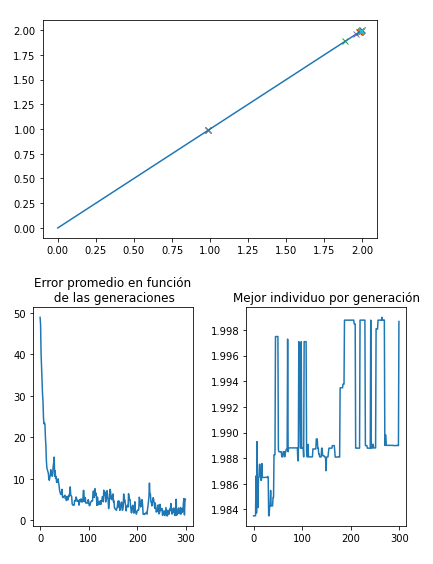


f(x) = cos(x)+5

Valor máximo encontrado:  5.999880059130615


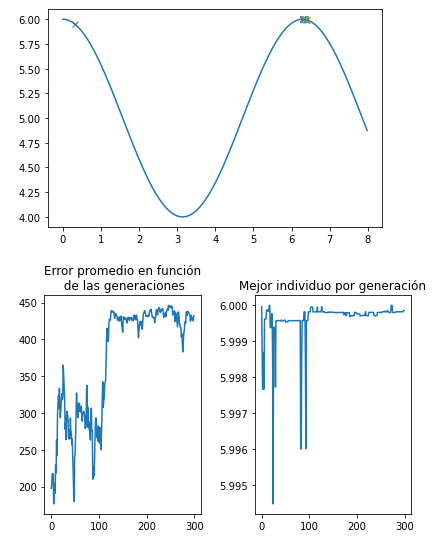

f(x) = sen(x)+45+x*7

Valor máximo encontrado:  59.84044757582606

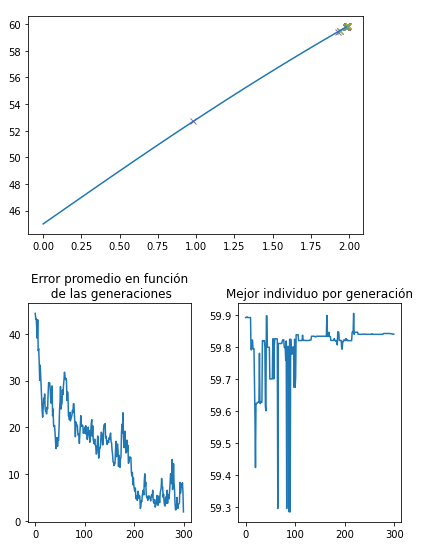


f(x) = -(0.1+(1-x)** 2-0.1*cos(6*pi*(1-x)))+10

Valor máximo encontrado:  1.9980522724020826

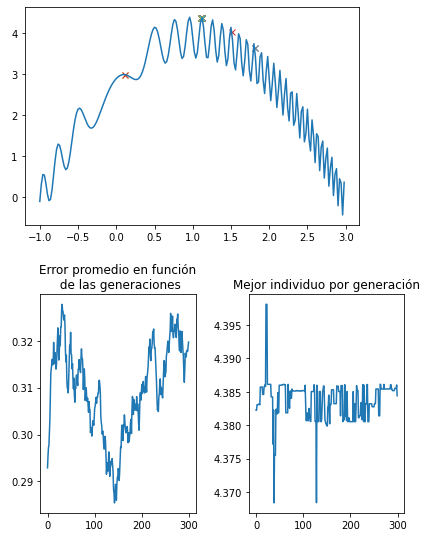
#    Pregunta 6:

El parámetro de tamaño de población afecta tanto el tiempo de ejecución como el espacio en memoria utilizado, pues de este depende el número de estructuras que se emplean en el algoritmo. El tamaño de genoma y la probabilidad de mutación también lo afecta, aunque en menor medida que el tamaño de población. El número de generaciones afecta sobretodo en el tiempo de ejecución, pues al final de cada generación gran parte del espacio en memoria se libera para dar paso a la siguiente. 
Por último, el rango de búsqueda afecta al espacio en memoria pues entre mayor sea el rango más genomas puede haber y más grande deberá ser el espacio de búsqueda.

#    Pregunta 7:

Teniendo en cuenta el análisis, el parámetro que más contribuye al aumento del tiempo de ejecución es el de tamaño
de la población, sin embargo, si se disminuyera este también se afectaría la efectividad del algoritmo. 
Otro parámetro que afectaría la efectividad es el tamaño del genoma y la probabilidad de mutación.
Por lo tanto, el parámetro que se debería cambiar para acelerar el tiempo de ejecución sería el rango de búsqueda, pues entre
más pequeño sea, y más cerca esté del máximo, más rápido se llegara al resultado correcto.